In [1]:
import sympy as smp
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint

## intro

In [5]:
x, y = smp.symbols('x,y', real= True)
y = x**2 + 3*x + 2
smp.solve(y,x)

[-2, -1]

In [6]:
# sympy to numpy
y_f = smp.lambdify([x], y)
y_f(0)

2

In [10]:
#phesant method
y.evalf(subs={x:0})

2.00000000000000

In [4]:
f = smp.symbols('f', cls=smp.Function)
f = f(x)
dfdx = smp.diff(f,x)
dfdx

Derivative(f(x), x)

In [11]:
smp.diff(y,x)

2*x + 3

## ultimate test

In [15]:
def func(S, t, m, k):
    x, z = S
    return [z, -k*x/m]

x0 = 1
z0 = 0
s0 = (x0, z0)

t = np.linspace(0,20,100)
m = 1
k = 2
odesol = odeint(func, s0, t, args=(m ,k))
x,z = odesol.T

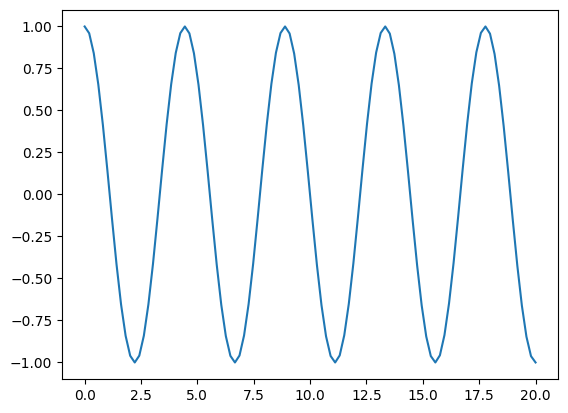

In [16]:
plt.plot(t,x)

### now equation lagrangian

In [19]:
m, k, t = smp.symbols('m k t', real=True)
x = smp.symbols('x', cls=smp.Function)
x=x(t)
dxdt = smp.diff(x)

In [20]:
# lagrangian construct
T = smp.Rational(1/2) * m * dxdt**2
V = smp.Rational(1/2) * k * x**2

L = T - V

In [21]:
# Euler - lagrangian
ans = -smp.diff(smp.diff(L,dxdt),t) + smp.diff(L,x)
ans

-k*x(t) - m*Derivative(x(t), (t, 2))

In [22]:
sols = smp.solve([ans], smp.diff(x,t,t))
sol = sols[smp.diff(x,t,t)]
sol

-k*x(t)/m

In [36]:
dzdt_f = smp.lambdify((t,m,k), sol)
dxdt_f = smp.lambdify(dxdt, dxdt)

In [ ]:
#simple pendulum
# https://www.acs.psu.edu/drussell/Demos/Pendulum/Pendulum.html

g = 9.81
l = 1
def sp(S,t):
    theta, z = S
    return [z, -g*np.sin(theta)/l]

s0 = [np.pi/6, 0]
ans = odeint(sp,s0,t)
theta,z = ans.T
plt.plot(t,theta)

![img](1.jpg)
![img](2.jpg)

In [3]:
m,l,g,k,t = smp.symbols('m,l,g,k,t', real= True, positive= True)
x, theta = smp.symbols('x, theta', cls=smp.Function)
x = x(t)
theta=theta(t)

In [28]:
DthetaDt = smp.diff(theta,t)
DxDt = smp.diff(x,t)
T = smp.Rational(1/2) * m * (DxDt**2 + ((l+x)**2)*DthetaDt**2)
V = -m*g*(l+x)*smp.cos(theta) + smp.Rational(1/2)*k*x**2
L = T-V
L

g*m*(l + x(t))*cos(theta(t)) - k*x(t)**2/2 + m*((l + x(t))**2*Derivative(theta(t), t)**2 + Derivative(x(t), t)**2)/2

In [29]:
ans1 = smp.diff(smp.diff(L,DxDt),t) - smp.diff(L,x)
ans2 = smp.diff(smp.diff(L,DthetaDt),t) - smp.diff(L,theta)
sol = smp.solve([ans1, ans2], [smp.diff(x,t,t), smp.diff(theta,t,t)])

In [31]:
sol[smp.diff(theta,t,t)]

-g*sin(theta(t))/(l + x(t)) - 2*Derivative(theta(t), t)*Derivative(x(t), t)/(l + x(t))